In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/seattle-weather.csv')

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


## EDA

In [4]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

<Axes: xlabel='temp_max', ylabel='Count'>

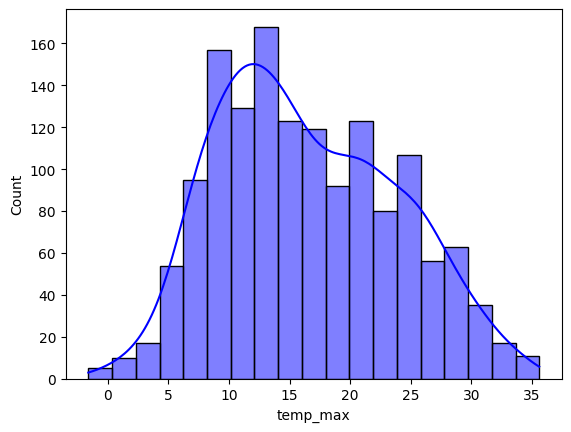

In [8]:
# Visualize temperature distribution
sns.histplot(df['temp_max'], kde=True, color='blue')

<Axes: >

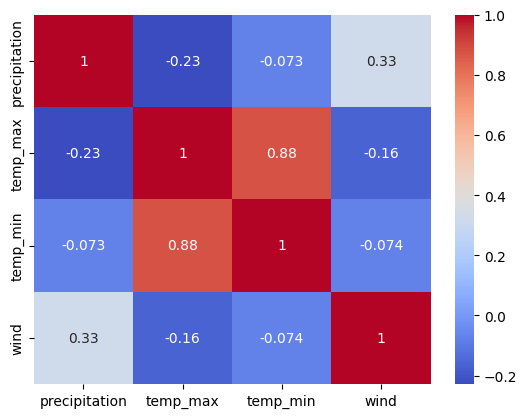

In [9]:
# Correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [10]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [11]:
plt.style.use('dark_background')

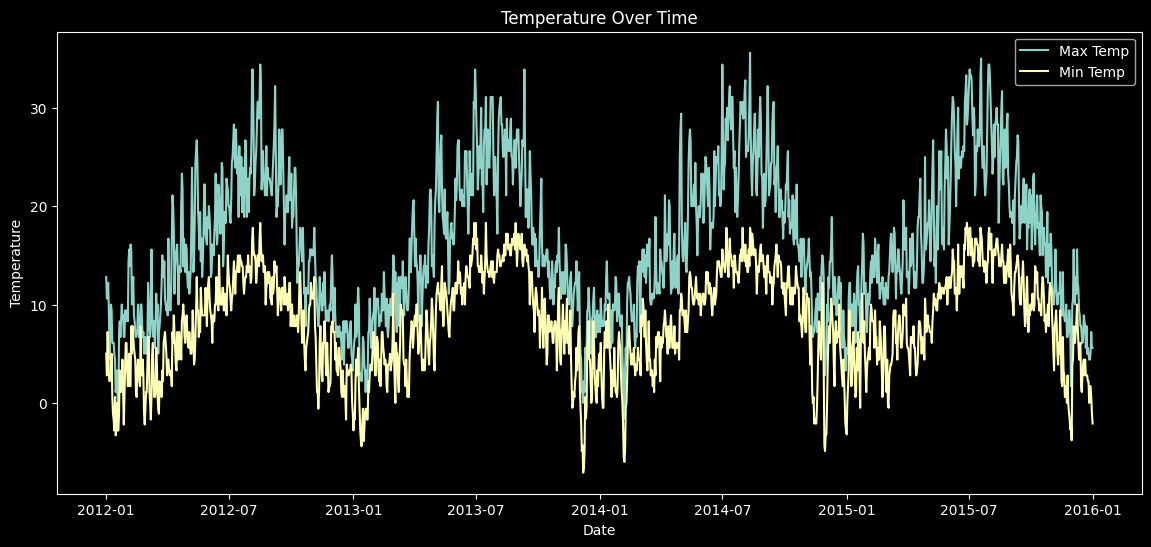

In [12]:

plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['temp_max'], label='Max Temp')
plt.plot(df['date'], df['temp_min'], label='Min Temp')
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()

Text(0.5, 1.0, 'Distribution of Weather Types')

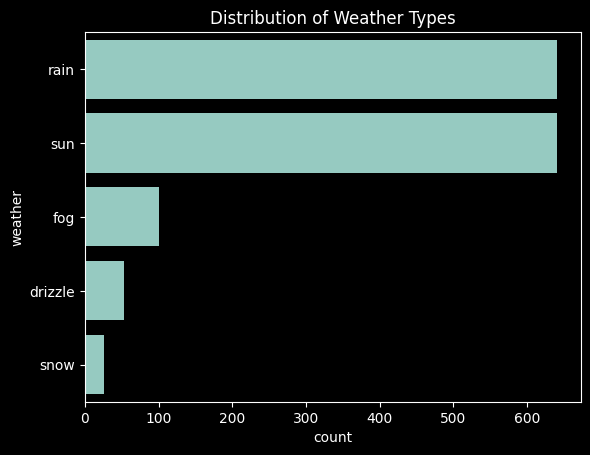

In [13]:
sns.countplot(data=df, y='weather', order=df['weather'].value_counts().index)
plt.title("Distribution of Weather Types")

Text(0.5, 1.0, 'Max Temperature by Weather Type')

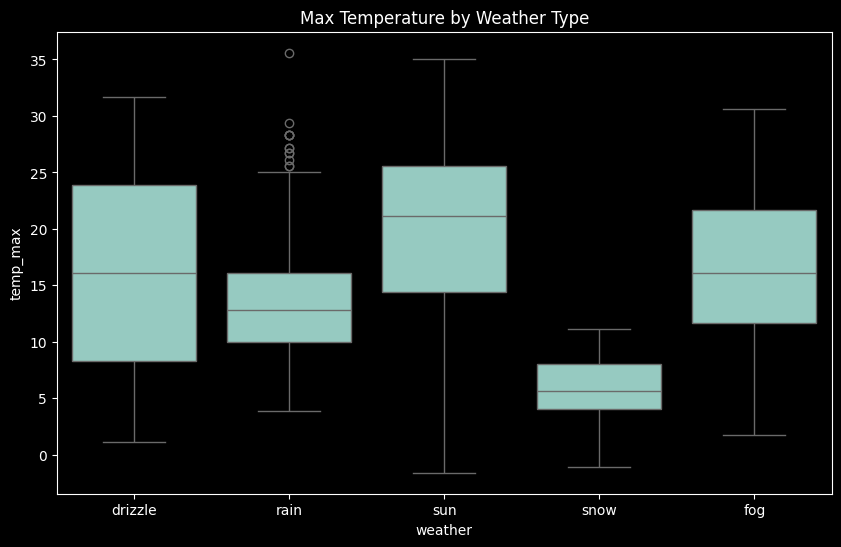

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weather', y='temp_max')
plt.title("Max Temperature by Weather Type")

Text(0.5, 1.0, 'Wind vs Temp Max')

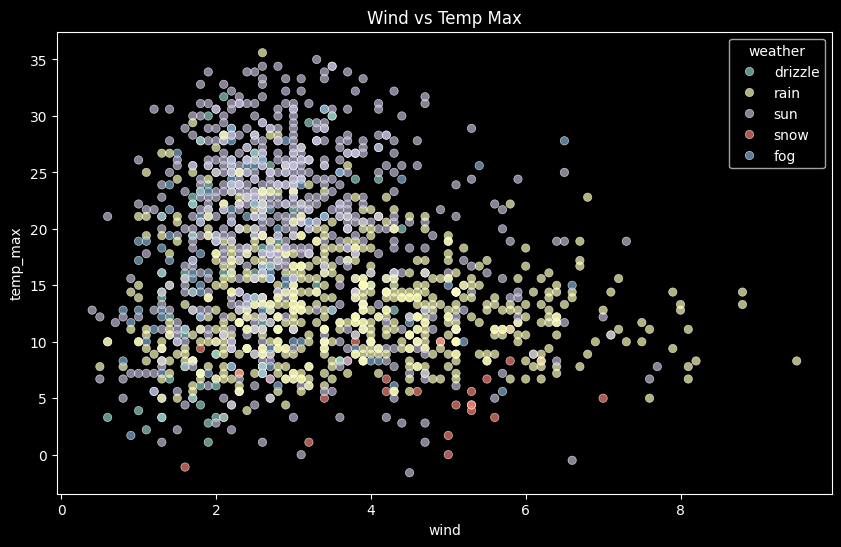

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='wind', y='temp_max', hue='weather', alpha=0.7)
plt.title("Wind vs Temp Max")

## Feature Engineering

In [16]:
# Create lag features using pandas
df['temp_max_lag'] = df['temp_max'].shift(1)  # Lag 1 day
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,temp_max_lag
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,NaN
1,2012-01-02,10.9,10.6,2.8,4.5,rain,12.8
2,2012-01-03,0.8,11.7,7.2,2.3,rain,10.6
3,2012-01-04,20.3,12.2,5.6,4.7,rain,11.7
4,2012-01-05,1.3,8.9,2.8,6.1,rain,12.2


In [17]:
# Drop the first row with NaN values after lagging
df.dropna(inplace=True)

### **Purpose of the Lag Feature in Time Series Forecasting:**

The **lag feature** is a crucial concept in time series forecasting. In simple terms, it refers to using past values (lags) of a variable as predictors for forecasting future values. The primary idea behind lag features is that **past behavior** of a time series can often inform predictions about **future behavior**.

#### **How it Helps:**
1. **Capturing Temporal Dependencies:**
   - In time series data, there's typically an inherent temporal correlation. For instance, the temperature today is likely related to the temperature of previous days (i.e., today’s temperature depends on the previous day's or a few days’ temperature). The lag feature captures this dependency.
   - Without lag features, a model would only be able to learn from the present values, which may not be enough for time series forecasting.

2. **Better Prediction Power:**
   - By creating lag features (e.g., temperature from the last 1, 2, or 10 days), the model gets access to additional context, making it more capable of making accurate predictions.
   - **Window-based features** (like rolling averages) can also help smooth out trends and reduce the impact of noise.

3. **Incorporating Historical Patterns:**
   - Historical data can reveal important patterns, such as seasonality (e.g., temperatures might have yearly patterns). Using lag features allows the model to understand these recurring patterns and predict more accurately.

4. **Handling Seasonality and Trend:**
   - If you're forecasting monthly or yearly trends (like weather, sales, etc.), lag features can help capture these regular patterns and trends over time. Without such features, models may struggle to generalize well, especially for cyclic data.

---


#### **1. Feature Engineering: Rolling Averages and Moving Windows**

Rolling windows are commonly used to capture trends and smooth out the noise in the data. Here's how you can add rolling averages and other rolling window features.




- **Rolling Averages:** These help capture smooth trends in the data by averaging over a window of time (e.g., 7 days or 30 days). They help reduce volatility and highlight the underlying trend.

- **Lag Features:** By shifting the temperature data (e.g., previous 7 days), you create a feature that indicates how the past week's temperature has influenced the present. This can be essential for forecasting.


In [18]:
# Creating additional lag features using rolling windows

# 7-day rolling average for temperature (or any other time-related feature)
df['temp_max_7day_avg'] = df['temp_max'].rolling(window=7).mean()


# Lag feature (previous 7 days' temperature)
df['temp_max_lag7'] = df['temp_max'].shift(7)

# Dropping NaN values that may appear after creating rolling averages and lags
df.dropna(inplace=True)


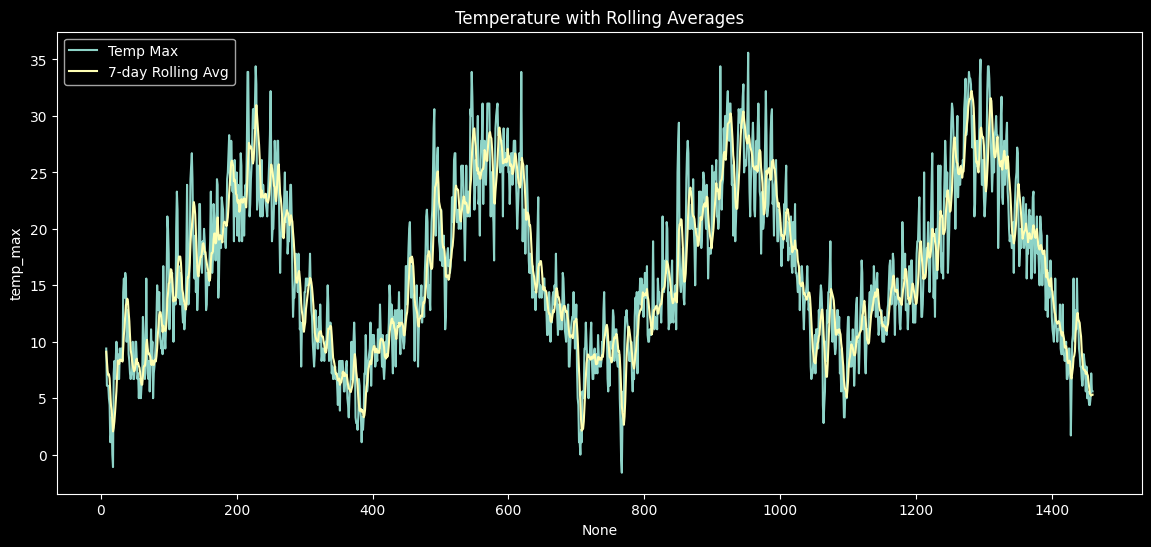

In [19]:

# Visualizing the rolling average
plt.figure(figsize=(14, 6))
sns.lineplot(x=df.index, y=df['temp_max'], label='Temp Max')
sns.lineplot(x=df.index, y=df['temp_max_7day_avg'], label='7-day Rolling Avg')
plt.title('Temperature with Rolling Averages')
plt.show()

In [ ]:
X = df[['temp_max_lag', 'wind', 'precipitation', 'temp_max_7day_avg', 'weather']]
y = df['temp_max']

In [21]:
X['weather'] = pd.factorize(X['weather'])[0]  # Convert categorical to numerical

/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_1817/196596181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['weather'] = pd.factorize(X['weather'])[0]  # Convert categorical to numerical


In [22]:
X.head()

,temp_max_lag,wind,precipitation,temp_max_7day_avg,weather
8,10.0,3.4,4.3,9.114286,0
9,9.4,3.4,1.0,8.314286,0
10,6.1,5.1,0.0,7.442857,1
11,6.1,1.9,0.0,7.042857,1
12,6.1,1.3,0.0,7.128571,1


In [23]:
from sklearn.model_selection import train_test_split

# Split data into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Reshape the data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


with shuffle=False, train_test_split preserves the original order of the data — this is especially important for time series data.

In [24]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input

In [25]:
model = Sequential()

In [ ]:
# Define the input layer
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Shape is (time_steps, features)

# First LSTM layer with dropout regularization
model.add(LSTM(units=50, return_sequences=True)) #units here represent neurons (memory cells)
model.add(Dropout(0.2))

# Second LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer with dropout
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer (predicting temp_max)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary to see the architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 50)          │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,651 (201.76 KB)

 Trainable params: 51,651 (201.76 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train the model with the training data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 298.4514 - val_loss: 476.7040
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 214.7942 - val_loss: 231.7175
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 96.3156 - val_loss: 169.3730
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.8711 - val_loss: 139.7077
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 59.6448 - val_loss: 121.2984
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49.1438 - val_loss: 103.0642
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.5476 - val_loss: 88.3425
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36.1543 - val_loss: 76.2486
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.2081 - val_loss: 66.1268
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.7080 - val_loss: 57.4095
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.7657 - val_loss: 51.1282
Epoch 12/100
37/37 ━━━━━━━━━━━━━━

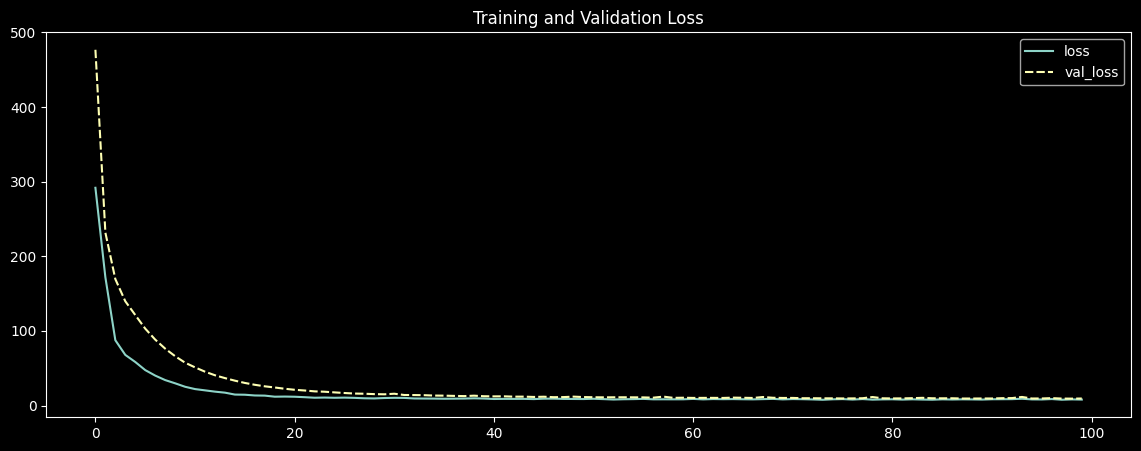

In [28]:
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(14,5))
# Plot training & validation accuracy values
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.title('Training and Validation Loss')
plt.show()

In [29]:
import plotly.express as px

# Create the Plotly line plot for training and validation loss
fig = px.line(history_df, 
              x=history_df.index, 
              y=['loss', 'val_loss'], 
              labels={'value': 'Loss', 'index': 'Epoch'},
              title="Training and Validation Loss")
              
# Show the plot
fig.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


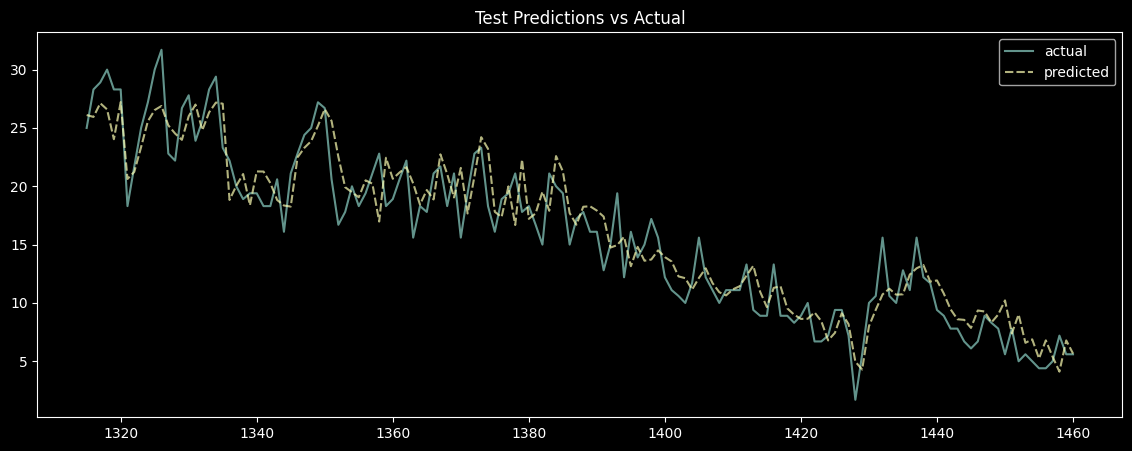

In [30]:
# Predicting the values for the test set
test_pred = model.predict(X_test)

# Flattening the predictions and actual values for plotting
test_pred = test_pred.flatten()

# Visualizing the predictions against the actual values
plt.figure(figsize=(14,5))
df_pred = pd.DataFrame({'actual': y_test, 'predicted': test_pred})
sns.lineplot(data=df_pred, alpha=0.7)
plt.title("Test Predictions vs Actual")
plt.show()


In [31]:
from sklearn.metrics import r2_score

# Predicting the values for the test set
test_pred = model.predict(X_test)

# Flattening the predictions and actual values for evaluation
test_pred = test_pred.flatten()

# Calculate the R² score
r2 = r2_score(y_test, test_pred)

# Print the R² score
print(f'R² score on the test set: {r2}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R² score on the test set: 0.8824296389332685


In [33]:
history_df.head()

,loss,val_loss
0,291.765137,476.704010
1,171.778214,231.717499
2,87.506439,169.373016
3,67.837952,139.707733
4,58.347412,121.298447


In [ ]:
train_pred = model.predict(X_train).flatten()
val_pred = model.predict(X_val).flatten()
test_pred = model.predict(X_test).flatten()

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step


In [ ]:
X_train.shape

(1217, 3)

### Using PyTorch

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

For compatibility:
- Convert from arrays to tensors
- Reshape for LSTM: The reshaping using `np.reshape()` is replaced by `unsqueeze(1)` in PyTorch. This adds a dimension of size 1 at the specified position (index 1), effectively creating the (samples, time steps, features) format where time steps is 1.

In [56]:
# Convert NumPy arrays to PyTorch Tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Split data into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)


In [57]:
# Reshape the data for LSTM (samples, time steps, features)
X_train = X_train.unsqueeze(1)  # Adds a time step dimension of 1
X_val = X_val.unsqueeze(1)
X_test = X_test.unsqueeze(1)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: torch.Size([1162, 1, 5])
Shape of X_val: torch.Size([145, 1, 5])
Shape of X_test: torch.Size([146, 1, 5])


In [59]:

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_units, num_layers, output_size, dropout_prob):
        super(LSTMModel, self).__init__()
        self.num_layers = num_layers
        self.hidden_units = hidden_units
        self.lstm1 = nn.LSTM(input_size, hidden_units, num_layers, batch_first=True, dropout=dropout_prob)
        self.lstm2 = nn.LSTM(hidden_units, hidden_units, num_layers, batch_first=True, dropout=dropout_prob)
        self.lstm3 = nn.LSTM(hidden_units, hidden_units, 1, batch_first=True, dropout=dropout_prob) # Last LSTM layer, output only the last time step
        self.dropout = nn.Dropout(dropout_prob)
        self.linear = nn.Linear(hidden_units, output_size)

    def forward(self, input_seq):
        batch_size = input_seq.size(0)
        h_0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).to(input_seq.device)
        c_0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).to(input_seq.device)

        out, _ = self.lstm1(input_seq, (h_0, c_0))
        out = self.dropout(out)

        out, _ = self.lstm2(out, (h_0, c_0)) # Using initial hidden/cell states for simplicity, can be managed differently
        out = self.dropout(out)

        out, _ = self.lstm3(out, (torch.zeros(1, batch_size, self.hidden_units).to(input_seq.device),
                                 torch.zeros(1, batch_size, self.hidden_units).to(input_seq.device)))
        out = self.dropout(out)

        # Only take the output from the last time step
        out = out[:, -1, :]
        out = self.linear(out)
        return out


In [60]:

# Instantiate the model
input_size = X_train.shape[2]  # Number of features
hidden_units = 50
num_layers = 1  # For each LSTM layer in the Keras code
output_size = 1  # Predicting temp_max
dropout_prob = 0.2


In [61]:

model = LSTMModel(input_size, hidden_units, num_layers, output_size, dropout_prob)
print(model)


LSTMModel(
  (lstm1): LSTM(5, 50, batch_first=True, dropout=0.2)
  (lstm2): LSTM(50, 50, batch_first=True, dropout=0.2)
  (lstm3): LSTM(50, 50, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [62]:

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())


In [63]:

# Create DataLoaders for efficient training
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [64]:

# Example training loop (for demonstration - you'll need to adjust epochs etc.)
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')

    # Validation loop
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            outputs = model(data)
            loss = criterion(outputs, target)
            val_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss/len(val_loader):.4f}')

# Example evaluation on the test set
model.eval()
test_loss = 0
with torch.no_grad():
    for data, target in test_loader:
        outputs = model(data)
        loss = criterion(outputs, target)
        test_loss += loss.item()
print(f'Test Loss: {test_loss/len(test_loader):.4f}')

Epoch [1/100], Loss: 295.7773
Epoch [1/100], Validation Loss: 500.3775
Epoch [2/100], Loss: 221.2891
Epoch [2/100], Validation Loss: 333.6459
Epoch [3/100], Loss: 138.0101
Epoch [3/100], Validation Loss: 255.8419
Epoch [4/100], Loss: 105.3457
Epoch [4/100], Validation Loss: 210.7129
Epoch [5/100], Loss: 86.8124
Epoch [5/100], Validation Loss: 179.1665
Epoch [6/100], Loss: 74.1753
Epoch [6/100], Validation Loss: 155.1769
Epoch [7/100], Loss: 66.9722
Epoch [7/100], Validation Loss: 137.5033
Epoch [8/100], Loss: 61.1369
Epoch [8/100], Validation Loss: 123.9448
Epoch [9/100], Loss: 58.2666
Epoch [9/100], Validation Loss: 113.3751
Epoch [10/100], Loss: 56.3871
Epoch [10/100], Validation Loss: 105.5917
Epoch [11/100], Loss: 54.3634
Epoch [11/100], Validation Loss: 99.6937
Epoch [12/100], Loss: 54.0742
Epoch [12/100], Validation Loss: 95.6900
Epoch [13/100], Loss: 53.6812
Epoch [13/100], Validation Loss: 92.4782
Epoch [14/100], Loss: 53.5150
Epoch [14/100], Validation Loss: 89.8262
Epoch [15/

## Cross-validation

In [ ]:
# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # 5-fold cross-validation

for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Reshape the data for GRU (samples, time steps, features)
    X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = np.reshape(X_val.values, (X_val.shape[0], 1, X_val.shape[1]))
    
    # Build the GRU model
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=10, batch_size=32)

# Predicting the values for the test set
test_pred = model.predict(X_test)

# Flattening the predictions and actual values for evaluation
test_pred = test_pred.flatten()

# Calculate the R² score
r2 = r2_score(y_test, test_pred)

# Print the R² score
print(f'R² score on the test set: {r2}')

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 304.9429 - val_loss: 179.1971
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 282.6121 - val_loss: 159.6393
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 256.7457 - val_loss: 131.4587
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 215.4011 - val_loss: 98.9369
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170.6857 - val_loss: 71.3412
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 138.3805 - val_loss: 53.0941
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 115.7133 - val_loss: 42.5914
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.8447 - val_loss: 37.0517
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 80.6781 - val_loss: 34.1423
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 73.7445 - val_loss: 32.7690
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 240.1664 - val_loss: 339.3104
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 208.2487 - val_loss: 256.1090
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 131.4331 - val_loss: 164.2587
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 77.5895 - val_loss: 115.8651
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.6319 - val_loss: 95.1020
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.2164 - val_loss: 85.1946
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52.6484 - val_loss: 79.3022
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.1708 - val_loss: 75.0942
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.6414 - val_loss: 70.4911
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.4802 - val_loss: 64.0029
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 291.7649 - val_loss: 305.6989
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 203.8414 - val_loss: 169.9554
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 104.6292 - val_loss: 112.1296
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72.7538 - val_loss: 90.8652
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.8902 - val_loss: 79.4046
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.8699 - val_loss: 70.9811
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.4972 - val_loss: 62.4798
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.7704 - val_loss: 54.2713
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.1576 - val_loss: 47.5825
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.4774 - val_loss: 41.3747
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 293.2866 - val_loss: 141.0447
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 161.0912 - val_loss: 43.7901
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.1634 - val_loss: 29.0285
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.6851 - val_loss: 25.4371
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.0206 - val_loss: 21.7735
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.4411 - val_loss: 17.6423
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.0324 - val_loss: 15.4050
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.4825 - val_loss: 13.2197
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.1513 - val_loss: 11.0431
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.5256 - val_loss: 9.6792
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 278.6144 - val_loss: 230.9778
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 121.0881 - val_loss: 122.6609
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.1284 - val_loss: 96.2790
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.5482 - val_loss: 81.7147
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.5211 - val_loss: 65.6137
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.3586 - val_loss: 52.4288
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.9967 - val_loss: 42.8913
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.8466 - val_loss: 36.3081
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.9107 - val_loss: 31.0368
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.9817 - val_loss: 26.5830
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/stepWARNING:tensorflow:5 out of the last 16 calls to <function TensorFlowTrainer.make_predict_function.<locals>.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # 5-fold cross-validation

for train_index, val_index in tscv.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Train your model here (e.g., LSTM model as before)
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)
# Predicting the values for the test set
test_pred = model.predict(X_test)
# Flattening the predictions and actual values for evaluation
test_pred = test_pred.flatten()
# Calculate the R² score
r2 = r2_score(y_test, test_pred)
# Print the R² score
print(f'R² score on the test set: {r2}')

___

## Compare to Linear Regression

Mean Squared Error: 6.505144224691504
R^2 Score: 0.8836006585898054


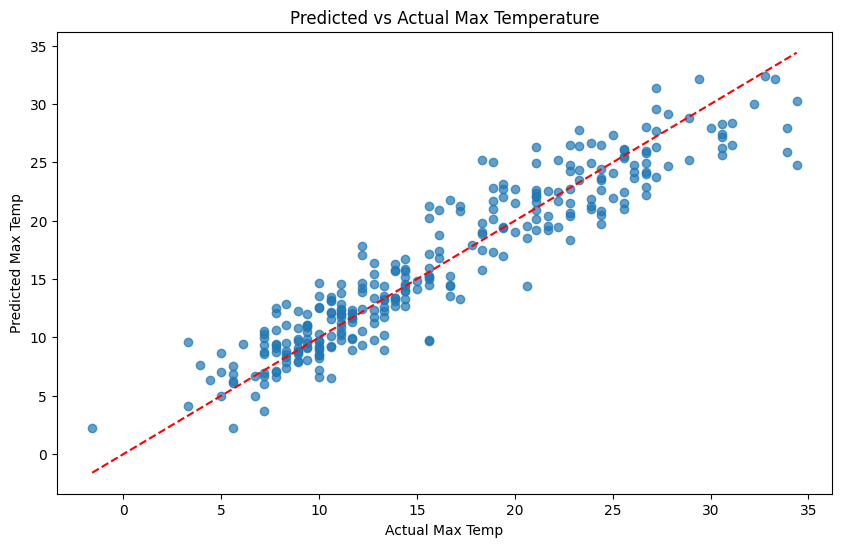

In [28]:

from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicted vs Actual Max Temperature")
plt.xlabel("Actual Max Temp")
plt.ylabel("Predicted Max Temp")
plt.show()


Good, you're asking very precisely now — let's get concrete.

---

For **daily time series data**, here's a **rough guideline** for training an LSTM *reasonably* well:

| Dataset Size | Typical Suitability |
|:------------|:--------------------|
| **< 1 year (~365 points)** | Too small for LSTM; better to use simple models. |
| **1–3 years (365–1,000 points)** | Still small; LSTM might struggle unless the problem is very simple. |
| **3–5 years (1,000–2,000 points)** | Borderline; might work if sequences are short and the signal is strong. |
| **5–10+ years (2,000–3,600+ points)** | Reasonable starting point for basic LSTM models. |
| **10+ years (3,600+ points)** | Good — LSTM can start to learn richer temporal patterns reliably. |

> **Summary:**  
> 👉 For daily data, **at least 5 years** (preferably **7–10 years**) is recommended if you want LSTM to have a fair chance without severe overfitting.

---

**More context:**

- **Sequence length** matters too:  
  If you use, say, a **30-day lookback window**, then you're turning your data into **(N - 30)** training samples.  
  So from 2,000 days, you get 1,970 samples — which sounds better, but still relatively small for deep models.

- **Type of data matters:**  
  - If your data has clear seasonal trends, strong periodicity (yearly, monthly), or long memory, then more years are needed.
  - If it's more "local" (short-term trends dominate), you might get away with fewer years.

---

### Example:

Suppose you have 2,000 daily points (~5.5 years).  
After making sequences with 30 days lookback:
- About 1,970 samples
- Then split: maybe 1,400 for training, 300 for validation, 270 for test.

Still a bit tight, but trainable **if** you use techniques like:
- Regularization (dropout, L2)
- Smaller LSTM models (not giant architectures)
- Early stopping

---

**Real-world tip:**  
Many Kaggle winning solutions for time series problems **don't even use LSTM** if the data is limited — they use **XGBoost / LightGBM** with lag/rolling features instead. It's extremely common.

---

Would you like me to show you:
- A **rule of thumb** for setting LSTM hyperparameters based on your data size?
- How to build a **minimal, effective LSTM** for small daily datasets?

(If yes, just tell me your exact dataset size!) 🚀  


You're asking an excellent question — and honestly, this kind of situation happens **very often** in practice.

Here’s the real story:

- **LSTM (Long Short-Term Memory networks)** are designed to capture **sequential** or **temporal dependencies** — when the *order* and *history* of data points matter a lot.
- **Standard regression models** (like linear regression, random forests, gradient boosting, etc.) usually treat the data as independent samples, not taking time into account directly (unless you manually add lag features).

Now, if **your time series problem** doesn't actually have **strong sequential dependencies**, or if the key information can be captured by **simple features** (like recent lags, moving averages, or trends), then **standard regression models can perform just as well as LSTMs** — sometimes even better because:

- LSTMs are harder to train.
- LSTMs need a lot of data to generalize properly.
- LSTMs can overfit easily if not tuned carefully.

**In short:**  
👉 If the "sequence" aspect is weak or can be approximated with simple features, then LSTM's "power" is wasted.

---

**Some reasons why you're seeing similar performance:**
1. **Weak temporal dependencies:** The future doesn't heavily depend on the past (or depends only slightly).
2. **Short memory needed:** Maybe just the last 1–3 time steps are enough — easy for simple models to capture.
3. **Small dataset:** LSTMs need lots of data. Without it, they can't really show their strength.
4. **Feature engineering:** Your standard regression might have good lag features or rolling statistics that already capture important patterns.
5. **LSTM not optimized:** Hyperparameters like learning rate, number of layers, sequence length, etc., matter a lot for LSTM to shine.

---

**Simple test:**  
You can check for *autocorrelation* or *partial autocorrelation* (ACF / PACF plots) of your target variable.  
If there's little autocorrelation at longer lags, then even sophisticated sequence models like LSTM won't help much.

---

Would you like me to help you:
- Check if your problem *actually benefits* from sequence models?
- Suggest what you could tweak to possibly make the LSTM perform better?
- Recommend when to just **stick with simpler models**?

(Just let me know which direction you want to explore!) 🚀  
Also: what is the dataset size, roughly? (Number of samples and features?)